# House Prices Prediction using TensorFlow Decision Forests

This notebook walks you through how to train a baseline Random Forest model using TensorFlow Decision Forests on the House Prices dataset made available for this competition.

Roughly, the code will look as follows:

```
import tensorflow_decision_forests as tfdf
import pandas as pd

dataset = pd.read_csv("project/dataset.csv")
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label="my_label")

model = tfdf.keras.RandomForestModel()
model.fit(tf_dataset)

print(model.summary())
```

Decision Forests are a family of tree-based models including Random Forests and Gradient Boosted Trees. They are the best place to start when working with tabular data, and will often outperform (or provide a strong baseline) before you begin experimenting with neural networks.

## Import the library

In [5]:
from google.colab import drive
drive.mount('/content/drive/')
import sys
import os
os.chdir("/content/drive/MyDrive/kaggle/CS671")

Mounted at /content/drive/


In [6]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing inst

In [7]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [ ]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.15.0
TensorFlow Decision Forests v1.8.1


## Load the dataset


In [2]:
import ast
import re
def preprocessing(df):

  def extract_listing_features(row):
    # Extracting location (assuming it's the first word before the first "·")
    location = row.split("·")[0].strip().lower()

    # Extracting rating (looking for patterns like ★4.74)
    rating_search = re.search(r'★(\d+\.\d+)', row)
    rating = float(rating_search.group(1)) if rating_search else None

    # Extracting number of bedrooms, beds
    bedrooms_search = re.search(r'(\d+) bedroom', row)
    bedrooms = int(bedrooms_search.group(1)) if bedrooms_search else None

    return pd.Series([location, rating, bedrooms])

  df[['Location', 'Rating', 'Bedrooms']] = df['name'].apply(extract_listing_features)

  # 将字符串安全地转换为列表
  df['description_length'] = df['description'].apply(lambda x: len(str(x)))

  df['amenities'] = df['amenities'].apply(ast.literal_eval)
  df['amenities_length'] = df['amenities'].apply(len)


  # 计算自注册以来的天数
  df['days_since_host'] = (pd.to_datetime(df['calendar_last_scraped']) - pd.to_datetime(df['host_since'])).dt.days


  # df['time_weighted_reviews'] = df['number_of_reviews_l30d'] * 3 + df['number_of_reviews_ltm'] * 2 + df['number_of_reviews']

  df['cluster'] = [chr(65 + n) for n in birch_model.predict(df[['longitude', 'latitude']])]

  def convert_bathrooms(bathroom_text):
      if pd.isna(bathroom_text):
          return None
      match = re.search(r"(\d+\.?\d*)", bathroom_text)
      return float(match.group(1)) if match else None

  # Function to extract bathroom type (Step 4)
  def extract_bathroom_type(bathroom_text):
      if pd.isna(bathroom_text):
          return None
      if 'shared' in bathroom_text.lower():
          return 'shared'
      elif 'private' in bathroom_text.lower():
          return 'private'
      else:
          return 'unknown'

  # Apply the functions to the 'bathrooms_text' column (Step 5)
  df['bathrooms_numeric'] = df['bathrooms_text'].apply(convert_bathrooms)
  df['bathroom_type'] = df['bathrooms_text'].apply(extract_bathroom_type)


  # df['average_availability'] = (df['availability_30'] + df['availability_60'] + df['availability_90'] + df['availability_365']) / 4

  # df['avg_minimum_nights'] = df[['minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm']].mean(axis=1)
  # df['avg_maximum_nights'] = df[['maximum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'maximum_nights_avg_ntm']].mean(axis=1)


  # 删除原始的列表列
  df.drop(['name','host_name','description','picture_url','scrape_id', 'host_id','last_scraped','calendar_last_scraped','amenities',
          #  'number_of_reviews_l30d','number_of_reviews_ltm','number_of_reviews',
          #  'minimum_nights','minimum_minimum_nights','minimum_nights_avg_ntm','maximum_minimum_nights','minimum_maximum_nights','maximum_nights','maximum_maximum_nights','maximum_nights_avg_ntm',
          #  'availability_30','availability_60','availability_90','availability_365',
           'host_since',
          #  'longitude','latitude',
           'bathrooms_text'
           ], axis=1, inplace=True)




In [8]:
train_file_path = "train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))
from sklearn.cluster import Birch
birch_model = Birch(n_clusters=4,threshold=0.2)
birch_model.fit_predict(dataset_df[['longitude', 'latitude']])
preprocessing(dataset_df)
ids = dataset_df.pop('id')
dataset_df = dataset_df.loc[:, dataset_df.nunique() > 1]
dataset_df.head()

Full train dataset shape is (15441, 48)


,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,...,calculated_host_listings_count_shared_rooms,Location,Rating,Bedrooms,description_length,amenities_length,days_since_host,cluster,bathrooms_numeric,bathroom_type
0,f,5.0,7.0,"['email', 'phone']",t,t,Harbor Gateway,City of Los Angeles,33.82749,-118.30795,...,5,home in torrance,NaN,1.0,920,35,1865,D,1.0,shared
1,t,3.0,3.0,"['email', 'phone']",t,t,Venice,City of Los Angeles,33.98404,-118.47002,...,0,rental unit in venice,4.74,2.0,1000,58,3699,C,2.0,unknown
2,f,118.0,189.0,"['email', 'phone', 'work_email']",t,t,Avalon,Other Cities,33.34187,-118.32847,...,0,home in avalon,5.00,3.0,1000,28,1533,B,2.0,unknown
3,f,5.0,6.0,"['email', 'phone']",t,t,Santa Clarita,Other Cities,34.45016,-118.55382,...,0,home in santa clarita,NaN,4.0,767,13,672,C,2.5,unknown
4,f,1020.0,1414.0,"['email', 'phone']",t,t,Westwood,City of Los Angeles,34.06036,-118.44171,...,0,hotel in los angeles,NaN,1.0,1000,23,196,C,1.0,unknown


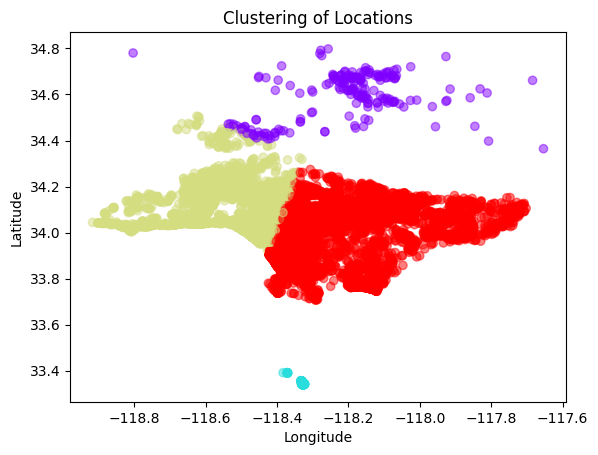

In [28]:
# Plot the results
plt.scatter(dataset_df['longitude'], dataset_df['latitude'], c= [ord(letter) - 65 for letter in dataset_df['cluster']], cmap='rainbow', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Locations')
plt.show()

The data is composed of 81 columns and 1460 entries. We can see all 81 dimensions of our dataset by printing out the first 3 entries using the following code:

In [ ]:
dataset_df.head(3)

,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,...,calculated_host_listings_count_shared_rooms,Location,Rating,Bedrooms,description_length,amenities_length,days_since_host,cluster,bathrooms_numeric,bathroom_type
0,f,5.0,7.0,"['email', 'phone']",t,t,Harbor Gateway,City of Los Angeles,33.82749,-118.30795,...,5,home in torrance,NaN,1.0,920,35,1865,D,1.0,shared
1,t,3.0,3.0,"['email', 'phone']",t,t,Venice,City of Los Angeles,33.98404,-118.47002,...,0,rental unit in venice,4.74,2.0,1000,58,3699,C,2.0,unknown
2,f,118.0,189.0,"['email', 'phone', 'work_email']",t,t,Avalon,Other Cities,33.34187,-118.32847,...,0,home in avalon,5.00,3.0,1000,28,1533,B,2.0,unknown


* There are 79 feature columns. Using these features your model has to predict the house sale price indicated by the label column named `SalePrice`.

We will drop the `Id` column as it is not necessary for model training.

We can inspect the types of feature columns using the following code:

In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15441 entries, 0 to 15440
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             15013 non-null  object 
 1   host_listings_count                           15441 non-null  float64
 2   host_total_listings_count                     15441 non-null  float64
 3   host_verifications                            15441 non-null  object 
 4   host_has_profile_pic                          15441 non-null  object 
 5   host_identity_verified                        15441 non-null  object 
 6   neighbourhood_cleansed                        15441 non-null  object 
 7   neighbourhood_group_cleansed                  15441 non-null  object 
 8   latitude                                      15441 non-null  float64
 9   longitude                                     15441 non-null 

## House Price Distribution

Now let us take a look at how the house prices are distributed.

count    15441.000000
mean         1.961337
std          1.619984
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: price, dtype: float64


<Axes: >

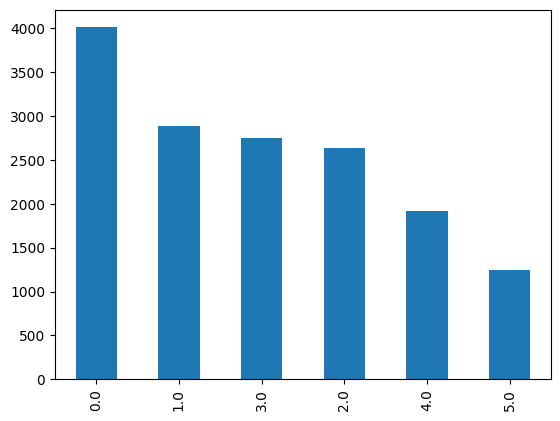

In [6]:
plt.figure()
dataset_df['price'].value_counts().plot(kind='bar')

## Numerical data distribution

We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [ ]:
list(set(dataset_df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [ ]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()
print(df_num.columns)

Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'Rating', 'Bedrooms',
       'description_length', 'amenities_length', 'days_since_host',
       'bathrooms_numeric'],
      dtype='object')


Now let us plot the distribution for all the numerical features.

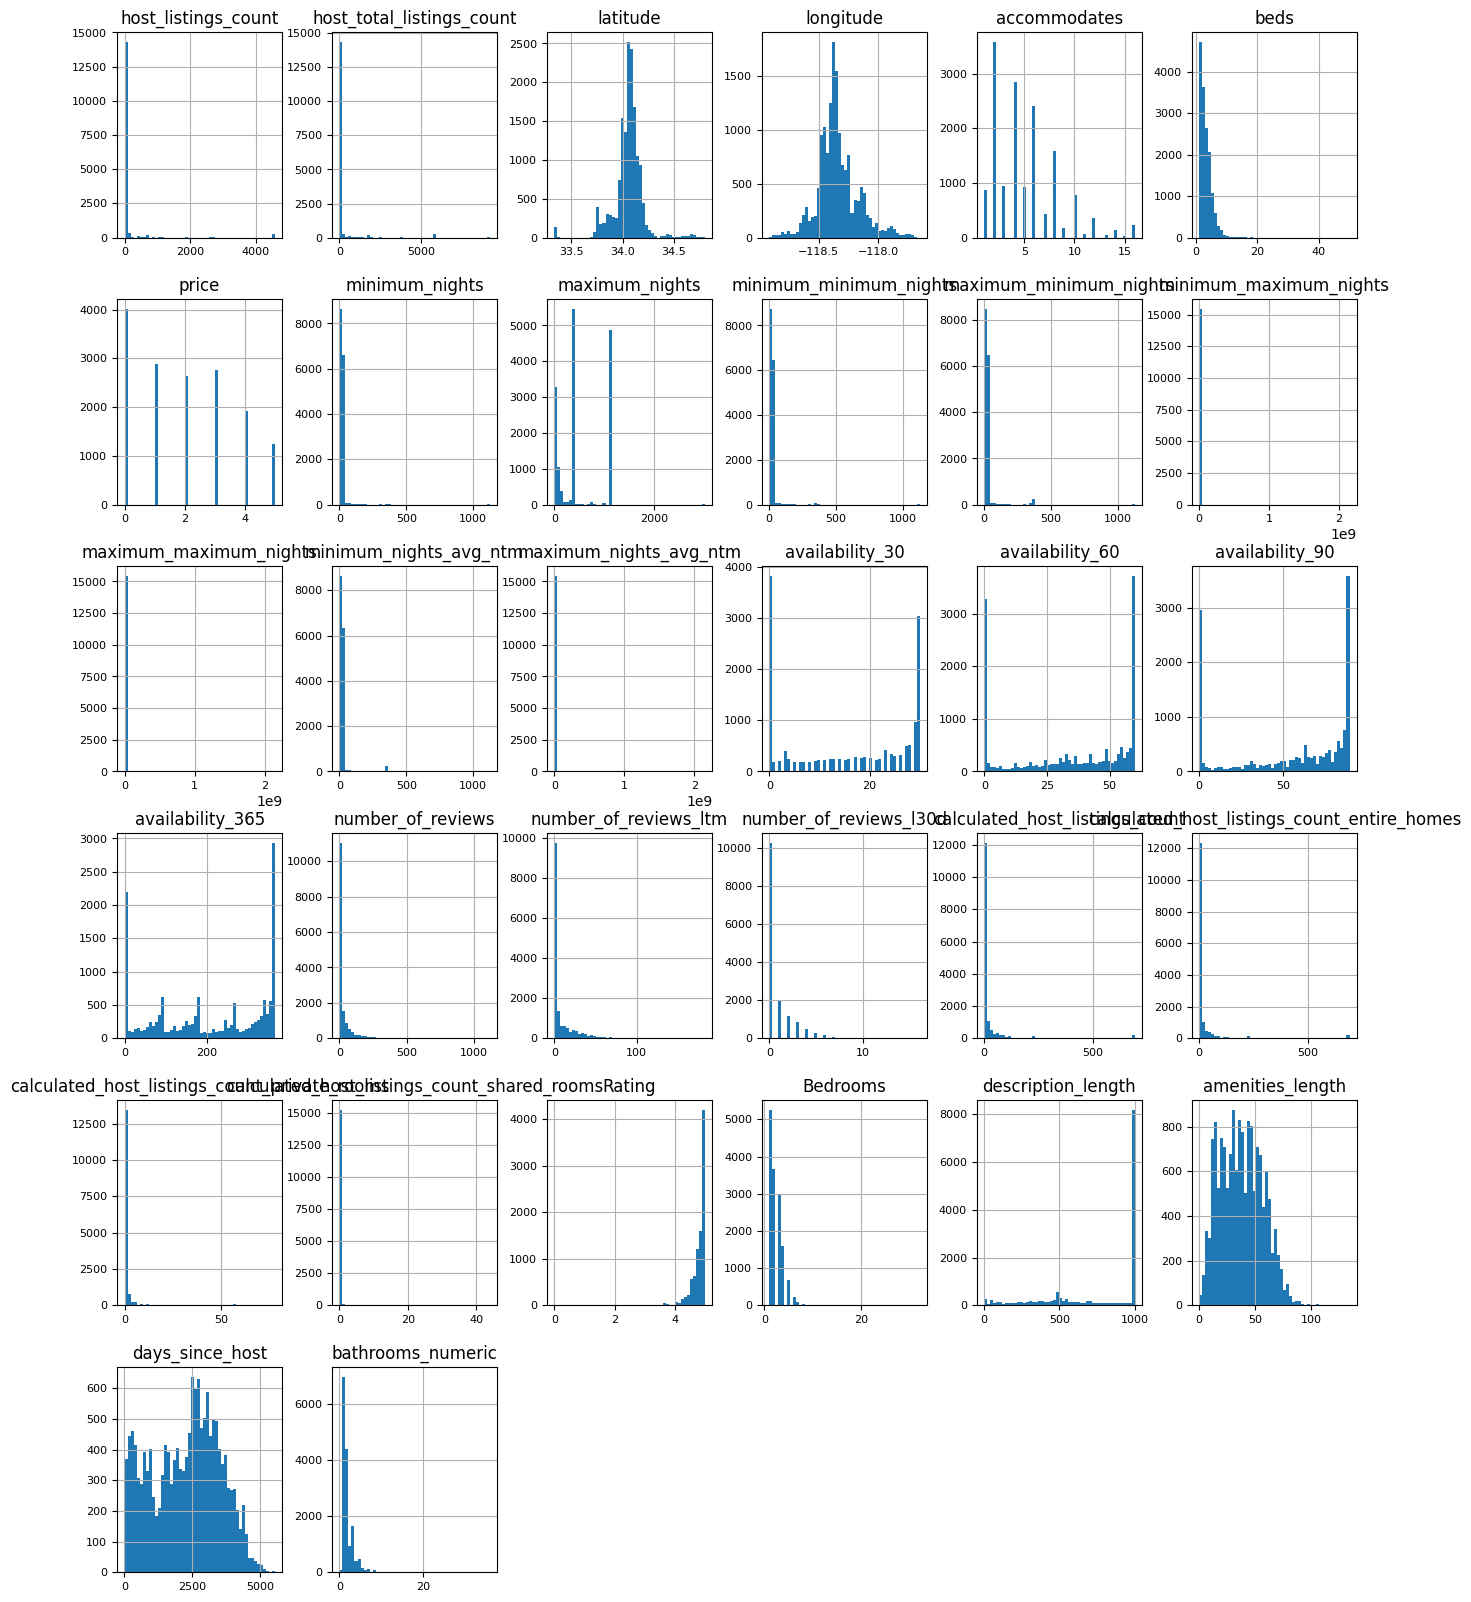

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

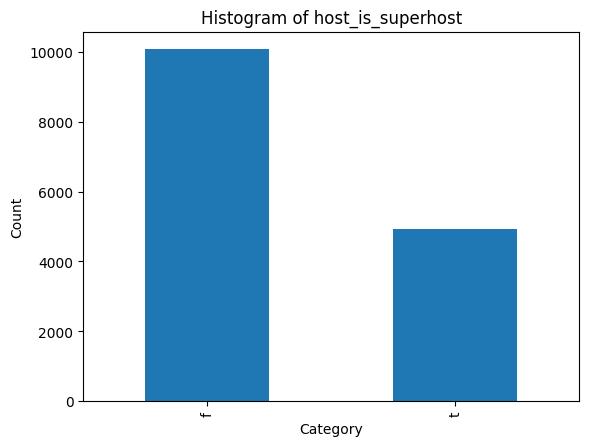

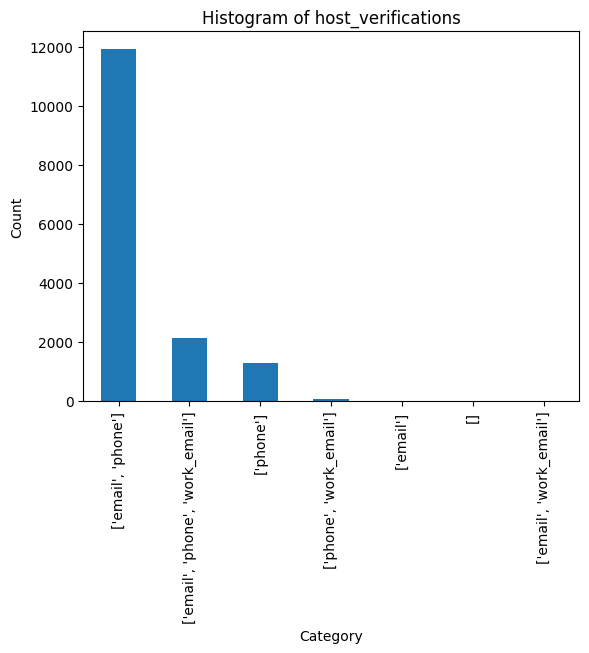

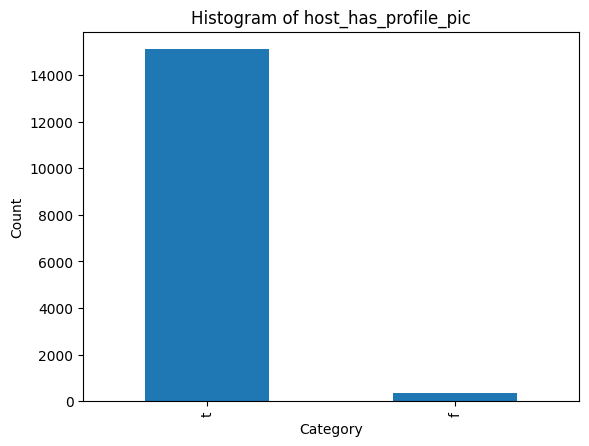

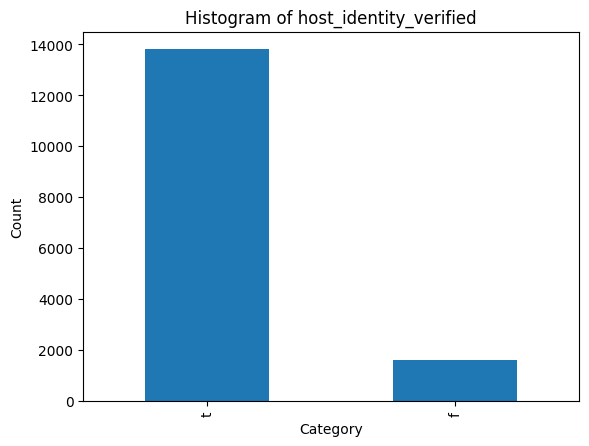

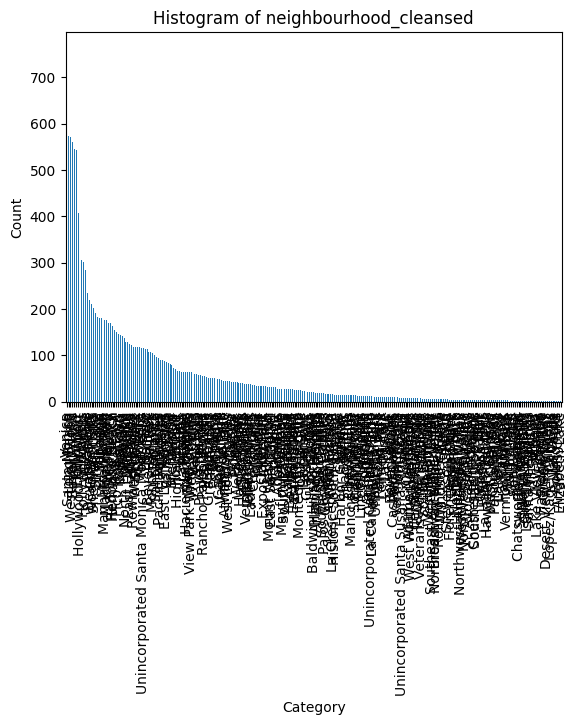

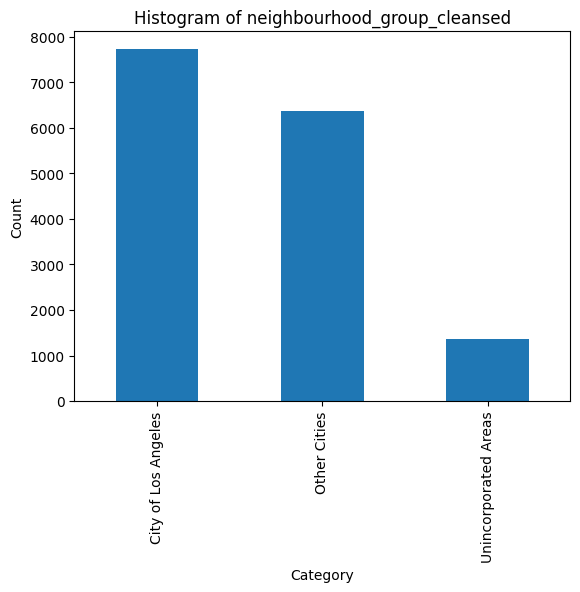

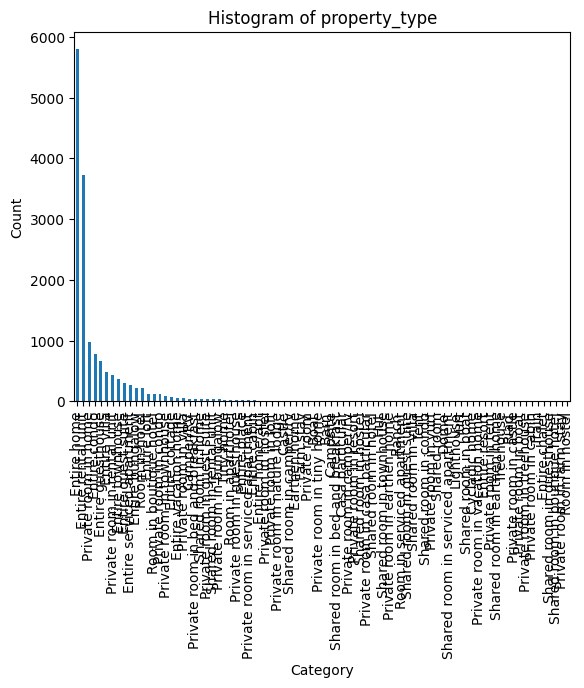

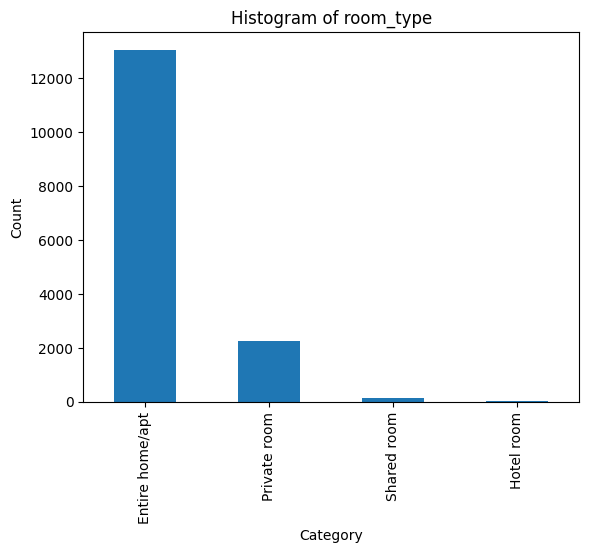

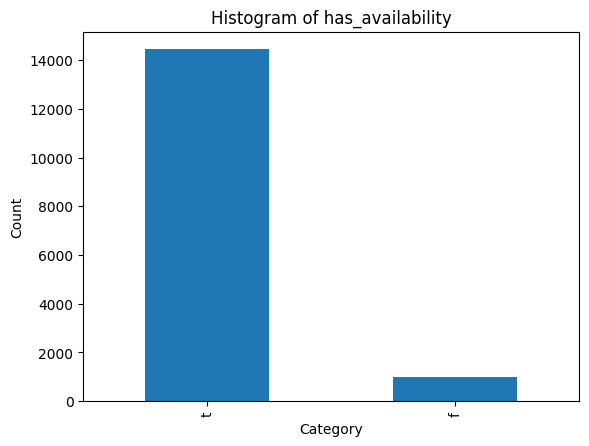

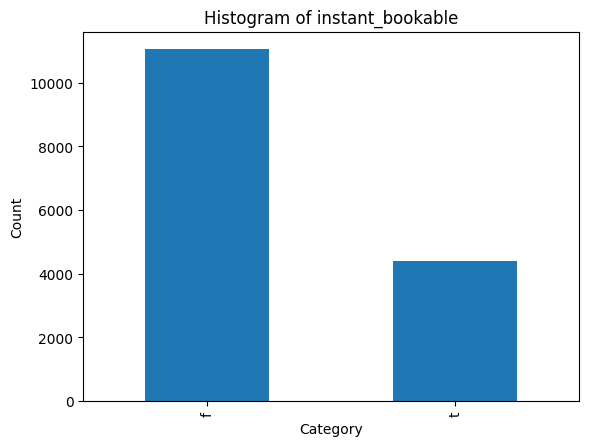

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32599 (\N{CJK UNIFIED IDEOGRAPH-7F57}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33945 (\N{CJK UNIFIED IDEOGRAPH-8499}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

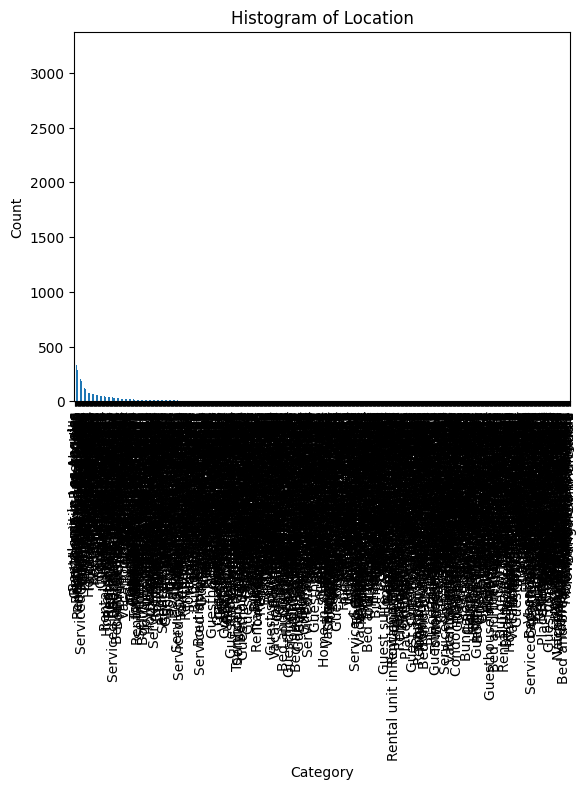

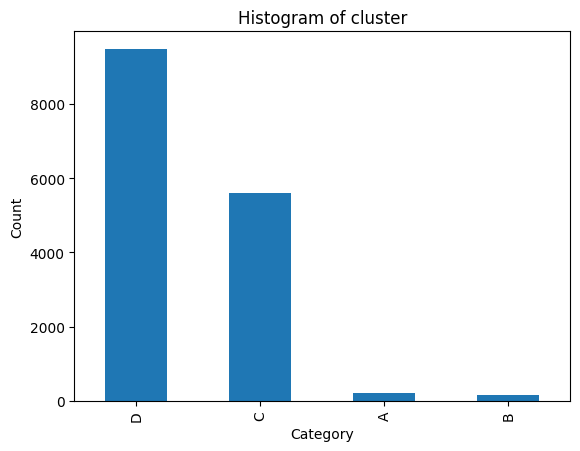

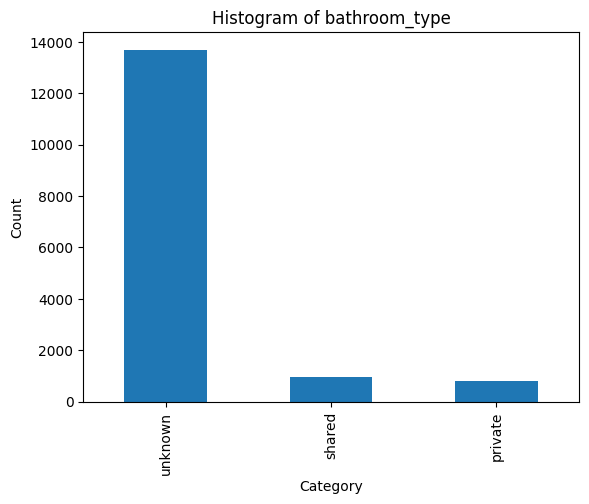

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设df是你的DataFrame
for column in dataset_df.columns:
    if dataset_df[column].dtype == 'object':  # 检查列是否为分类变量
        dataset_df[column].value_counts().plot(kind='bar')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.title(f'Histogram of {column}')

        plt.show(block=False)
        plt.close()   # 关闭图表


In [ ]:
dataset_df.columns

Index(['host_since', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms',
       'verification_work_email', 'verification_phone', 'verification_email',
       'time_weighted_reviews'],
     

## Prepare the dataset

This dataset contains a mix of numeric, categorical and missing features. TF-DF supports all these feature types natively, and no preprocessing is required. This is one advantage of tree-based models, making them a great entry point to Tensorflow and ML.

Now let us split the dataset into training and testing datasets:

In [ ]:
!pip install imbalanced-learn

In [9]:
from imblearn.over_sampling import RandomOverSampler

label = 'price'

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

def resampled(dataset):
  # 应用过采样
  ros = RandomOverSampler(random_state=0)
  dataset_resampled, labels_resampled = ros.fit_resample(dataset.drop(label, axis=1), dataset[label])

  # 将标签重新加入到数据框架中
  dataset_resampled[label] = labels_resampled

  return dataset_resampled

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)


# dataset_df = resampled(dataset_df)

# 创建 TensorFlow 数据集
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task=tfdf.keras.Task.CLASSIFICATION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task=tfdf.keras.Task.CLASSIFICATION)
dataset_ds = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label=label, task=tfdf.keras.Task.CLASSIFICATION)
print("{} examples in training, {} examples for validation.".format(len(train_ds_pd), len(valid_ds_pd)))

10769 examples in training, 4672 examples for validation.


There's one more step required before we can train the model. We need to convert the datatset from Pandas format (`pd.DataFrame`) into TensorFlow Datasets format (`tf.data.Dataset`).

[TensorFlow Datasets](https://www.tensorflow.org/datasets/overview) is a high performance data loading library which is helpful when training neural networks with accelerators like GPUs and TPUs.

## Select a Model

There are several tree-based models for you to choose from.

* RandomForestModel
* GradientBoostedTreesModel
* CartModel
* DistributedGradientBoostedTreesModel

To start, we'll work with a Random Forest. This is the most well-known of the Decision Forest training algorithms.

A Random Forest is a collection of decision trees, each trained independently on a random subset of the training dataset (sampled with replacement). The algorithm is unique in that it is robust to overfitting, and easy to use.

We can list the all the available models in TensorFlow Decision Forests using the following code:

In [ ]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

## How can I configure them?

TensorFlow Decision Forests provides good defaults for you (e.g. the top ranking hyperparameters on our benchmarks, slightly modified to run in reasonable time). If you would like to configure the learning algorithm, you will find many options you can explore to get the highest possible accuracy.

You can select a template and/or set parameters as follows:

```rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)```

Read more [here](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel).

## Create a Random Forest

Today, we will use the defaults to create the Random Forest Model while specifiyng the task type as `tfdf.keras.Task.REGRESSION`.

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score
from itertools import product

def balanced_accuracy(y_true, y_pred):
    return balanced_accuracy_score(y_true, tf.argmax(y_pred, axis=1))

def cross_validation(dataset_df, param_dict, model, k_fold=5):
    scores = []
    for  fold_idx, (train_indices, test_indices) in enumerate(KFold(n_splits=k_fold, shuffle=True).split(dataset_df)):
        # Extract the training and testing examples.
        sub_train_df = dataset_df.iloc[train_indices]
        sub_test_df = dataset_df.iloc[test_indices]
        y=sub_test_df['price']
        # Convert the examples into tensorflow datasets.
        sub_train_df = tfdf.keras.pd_dataframe_to_tf_dataset(sub_train_df, label='price', task=tfdf.keras.Task.CLASSIFICATION)
        sub_test_df = tfdf.keras.pd_dataframe_to_tf_dataset(sub_test_df, label='price', task=tfdf.keras.Task.CLASSIFICATION)
        tuned_model = model(**param_dict)
        tuned_model.compile(metrics=[balanced_accuracy])
        tuned_model.fit(sub_train_df,verbose=False)
        preds = tuned_model.predict(sub_test_df)
        ap = balanced_accuracy(y,preds)
        scores.append(ap)
    return np.mean(scores)

In [ ]:
param_grid = {
    # 'max_iter': np.arange(50, 501, 50),  # Maximum number of iterations
    # 'learning_rate': np.logspace(-3, 0, num=100),  # Learning rate
    # 'max_depth': list(range(1, 10)),  # Maximum depth of the trees
    "min_examples": [2, 5, 7, 10]
    # 'l2_regularization': list(np.logspace(-9, 0, num=100)),  # L2 regularization term
}

best_balanced_accuracy_score = 0
best_params = None
for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    score=cross_validation(train_ds_pd, param_dict, tfdf.keras.GradientBoostedTreesModel)
    print(f"Parameters: {param_dict}, Average balanced_accuracy_score: {score}")
    if score > best_balanced_accuracy_score:
            best_balanced_accuracy_score = score
            best_params = param_dict

print(f"Best Parameters: {best_params}, Best Average balanced_accuracy_scoreF1: {best_balanced_accuracy_score}")

Use /tmp/tmpif0kiftg as temporary training directory
3/3 [==============================] - 0s 30ms/step
Use /tmp/tmplsfom3oz as temporary training directory


KeyboardInterrupt: ignored

## Train the model

We will train the model using a one-liner.

Note: you may see a warning about Autograph. You can safely ignore this, it will be fixed in the next release.

In [ ]:
# Create a Random Search tuner with 50 trials and automatic hp configuration.
tuner = tfdf.tuner.RandomSearch(num_trials=25, use_predefined_hps=True)

# Define and train the model.
tuned_model = tfdf.keras.GradientBoostedTreesModel(tuner=tuner)
tuned_model.compile(metrics=[balanced_accuracy])
tuned_model.fit(train_ds, verbose=2)

Use /tmp/tmpysrfz6ck as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'host_is_superhost': <tf.Tensor 'data:0' shape=(None,) dtype=string>, 'host_listings_count': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'host_total_listings_count': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'host_verifications': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'host_has_profile_pic': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'host_identity_verified': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'neighbourhood_cleansed': <tf.Tensor 'data_6:0' shape=(None,) dtype=string>, 'neighbourhood_group_cleansed': <tf.Tensor 'data_7:0' shape=(None,) dtype=string>, 'latitude': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'longitude': <tf.Tensor 'data_9:0' shape=(None,) dtype=float64>, 'property_type': <tf.Tensor 'data_10:0' shape=(None,) dtype=string>, 'room_type': <tf.Tensor 'data_11:0' shape=(None,) dtype=string>, 'accommo

[INFO 23-11-22 17:59:28.7587 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 23-11-22 17:59:28.7588 UTC kernel.cc:772] Collect training examples
[INFO 23-11-22 17:59:28.7588 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-11-22 17:59:28.7595 UTC kernel.cc:391] Number of batches: 11
[INFO 23-11-22 17:59:28.7595 UTC kernel.cc:392] Number of examples: 10846
[INFO 23-11-22 17:59:28.7870 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column host_verifications (5 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 23-11-22 17:59:28.7923 UTC dat

Model trained in 4:55:27.980488
Compiling model...
Model compiled.


In [ ]:
# Create a Random Search tuner with 50 trials and automatic hp configuration.
tuner = tfdf.tuner.RandomSearch(num_trials=25, use_predefined_hps=True)


# Define and train the model.
tuned_model = tfdf.keras.RandomForestModel(tuner=tuner)
tuned_model.compile(metrics=[balanced_accuracy])
tuned_model.fit(train_ds,validation_data=valid_ds, verbose=2)

Use /tmp/tmpqtybnl82 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'host_is_superhost': <tf.Tensor 'data:0' shape=(None,) dtype=string>, 'host_listings_count': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'host_total_listings_count': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'host_verifications': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'host_has_profile_pic': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'host_identity_verified': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'neighbourhood_cleansed': <tf.Tensor 'data_6:0' shape=(None,) dtype=string>, 'neighbourhood_group_cleansed': <tf.Tensor 'data_7:0' shape=(None,) dtype=string>, 'latitude': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'longitude': <tf.Tensor 'data_9:0' shape=(None,) dtype=float64>, 'property_type': <tf.Tensor 'data_10:0' shape=(None,) dtype=string>, 'room_type': <tf.Tensor 'data_11:0' shape=(None,) dtype=string>, 'accommo

[INFO 23-11-24 16:55:57.4117 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 23-11-24 16:55:57.4119 UTC kernel.cc:772] Collect training examples
[INFO 23-11-24 16:55:57.4119 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-11-24 16:55:57.4126 UTC kernel.cc:391] Number of batches: 11
[INFO 23-11-24 16:55:57.4126 UTC kernel.cc:392] Number of examples: 10891
[INFO 23-11-24 16:55:57.4611 UTC data_spec_inference.cc:305] 59 item(s) have been pruned (i.e. they are considered out of dictionary) for the column neighbourhood_cleansed (194 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 23-11-24 16:55:57.4630 

In [ ]:
better_default_gbt_model = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template='better_default')
better_default_gbt_model.compile(metrics=[balanced_accuracy])
better_default_gbt_model.fit(dataset_ds, verbose=False)
better_default_gbt_model.save("models/better_default_gbt_model/")

Resolve hyper-parameter template "better_default" to "better_default@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL'}.
Use /tmp/tmp8zv7g9za as temporary training directory


In [ ]:
better_default_rf_model = tfdf.keras.RandomForestModel(hyperparameter_template='better_default')
better_default_rf_model.compile(metrics=[balanced_accuracy])
better_default_rf_model.fit(dataset_ds, verbose=False)
better_default_rf_model.save("models/better_default_rf_model/")

Resolve hyper-parameter template "better_default" to "better_default@v1" -> {'winner_take_all': True}.
Use /tmp/tmpupzeam1a as temporary training directory


In [ ]:
parameters = {
    "split_axis": "SPARSE_OBLIQUE",
    "sparse_oblique_projection_density_factor": 2.0,
    "sparse_oblique_normalization": "MIN_MAX",
    "sparse_oblique_weights": "BINARY",
    "categorical_algorithm": "CART",
    "growing_strategy": "BEST_FIRST_GLOBAL",
    "max_num_nodes": 256,
    "sampling_method": "RANDOM",
    "subsample": 1.0,
    "shrinkage": 0.02,
    "min_examples": 5,
    "use_hessian_gain": True,  # Assuming 'true' is meant to be a boolean
    "num_candidate_attributes_ratio": 0.9
}

# better_default_gbt_model = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template='better_default')
gbt = tfdf.keras.GradientBoostedTreesModel(**parameters)
gbt.compile(metrics=[balanced_accuracy])
gbt.fit(dataset_ds, verbose=False)
gbt.save("models/gbt/")

Use /tmp/tmp2qt6mk30 as temporary training directory


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-d916cee01188>", line 21, in <cell line: 21>
    gbt.save("models/gbt/")
  File "/usr/local/lib/python3.10/dist-packages/tensorflow_decision_forests/keras/core.py", line 2057, in save
    super(CoreModel, self).save(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/lib/io/file_io.py", line 513, in recursive_create_dir_v2
    _pywrap_file_io.RecursivelyCreateDir(compat.path_to_bytes(path))
tensorflow.python.framework.errors_impl.FailedPreconditionError: models; Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call las

In [ ]:
# parameters = {
#     "split_axis": "SPARSE_OBLIQUE",
#     "sparse_oblique_projection_density_factor": 5.0,
#     "sparse_oblique_normalization": "MIN_MAX",
#     "sparse_oblique_weights": "CONTINUOUS",
#     "categorical_algorithm": "CART",
#     "winner_take_all": "true",
#     "max_depth": 16,
#     "min_examples": 1
# }

parameters = {
    "split_axis": "SPARSE_OBLIQUE",
    "sparse_oblique_projection_density_factor": 2.0,
    "sparse_oblique_normalization": "MIN_MAX",
    "sparse_oblique_weights": "CONTINUOUS",
    "categorical_algorithm": "CART",
    "winner_take_all": "true",
    "max_depth": 20,
    "min_examples": 1
}


rf = tfdf.keras.RandomForestModel(**parameters)
rf.compile(metrics=[balanced_accuracy])
rf.fit(dataset_ds, verbose=False)
rf.save("models/rf/")

Use /tmp/tmptmvxvg4o as temporary training directory


In [1]:
rf.save("models/rf/")

NameError: ignored

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.7 MB/s eta 0:00:00


In [ ]:
import optuna

def objective(trial: optuna.Trial) -> float:
    params = {
        "max_depth": trial.suggest_int("max_depth", 5, 10),
        # "max_num_nodes": trial.suggest_int("max_num_nodes", 16, 256),
        # "l1_regularization": trial.suggest_float("l1_regularization", 0.01, 20),
        # "l2_regularization": trial.suggest_float("l2_regularization", 0.01, 20),
        "growing_strategy": trial.suggest_categorical(
            "growing_strategy", ["LOCAL", "BEST_FIRST_GLOBAL"]
        ),
        "categorical_algorithm": trial.suggest_categorical(
            "categorical_algorithm", ["CART", "RANDOM"]
        ),
        "min_examples": trial.suggest_int("min_examples", 5, 10),
        "focal_loss_alpha": trial.suggest_float("focal_loss_alpha", 0.05, 0.6),
        "num_candidate_attributes_ratio": trial.suggest_float(
            "num_candidate_attributes_ratio", 0.05, 0.95
        ),
        "shrinkage": trial.suggest_float("shrinkage", 0.01, 0.9),
        # "num_trees": 2000,
        "num_trees": trial.suggest_int("num_trees", 300, 2000),
    }

    return cross_validation(train_ds_pd, params, tfdf.keras.GradientBoostedTreesModel)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
best_params = study.best_params
print(best_params)
gbt = tfdf.keras.GradientBoostedTreesModel(**best_params)

[I 2023-11-22 03:22:46,007] A new study created in memory with name: no-name-0d0a0157-1639-4ba3-a5fa-02e1c176f1e8


Use /tmp/tmpwbol2pim as temporary training directory
3/3 [==============================] - 0s 55ms/step
Use /tmp/tmprxbkb2g5 as temporary training directory


3/3 [==============================] - 0s 31ms/step
Use /tmp/tmptw74inka as temporary training directory


3/3 [==============================] - 0s 15ms/step
Use /tmp/tmpd5qgq24o as temporary training directory


3/3 [==============================] - 0s 22ms/step
Use /tmp/tmp_6q6aihq as temporary training directory


3/3 [==============================] - 0s 15ms/step


[I 2023-11-22 03:23:50,301] Trial 0 finished with value: 0.48914285526452417 and parameters: {'max_depth': 10, 'growing_strategy': 'LOCAL', 'categorical_algorithm': 'CART', 'min_examples': 9, 'focal_loss_alpha': 0.47452135463606787, 'num_candidate_attributes_ratio': 0.49359289163852793, 'shrinkage': 0.46421735853672436, 'num_trees': 481}. Best is trial 0 with value: 0.48914285526452417.


Use /tmp/tmpdu94l6eu as temporary training directory
3/3 [==============================] - 0s 26ms/step
Use /tmp/tmppmdxdcpo as temporary training directory
3/3 [==============================] - 0s 16ms/step
Use /tmp/tmpu7k824fx as temporary training directory
3/3 [==============================] - 0s 31ms/step
Use /tmp/tmpxr4pb1_x as temporary training directory
3/3 [==============================] - 0s 15ms/step
Use /tmp/tmp0b1h9bh4 as temporary training directory
3/3 [==============================] - 0s 17ms/step


[I 2023-11-22 03:26:24,214] Trial 1 finished with value: 0.49876361671274816 and parameters: {'max_depth': 10, 'growing_strategy': 'LOCAL', 'categorical_algorithm': 'RANDOM', 'min_examples': 10, 'focal_loss_alpha': 0.3976250367957032, 'num_candidate_attributes_ratio': 0.5630395957700525, 'shrinkage': 0.41847439816250837, 'num_trees': 1421}. Best is trial 1 with value: 0.49876361671274816.


Use /tmp/tmpyt0tipd9 as temporary training directory
3/3 [==============================] - 0s 16ms/step
Use /tmp/tmpbez1yf3a as temporary training directory
3/3 [==============================] - 0s 15ms/step
Use /tmp/tmp4_n0ocfx as temporary training directory
3/3 [==============================] - 0s 28ms/step
Use /tmp/tmp0g8n10ac as temporary training directory
3/3 [==============================] - 0s 30ms/step
Use /tmp/tmp34emvdu7 as temporary training directory
3/3 [==============================] - 0s 14ms/step


[I 2023-11-22 03:29:18,097] Trial 2 finished with value: 0.4938477646531904 and parameters: {'max_depth': 10, 'growing_strategy': 'LOCAL', 'categorical_algorithm': 'RANDOM', 'min_examples': 9, 'focal_loss_alpha': 0.05792832760277128, 'num_candidate_attributes_ratio': 0.7134702525427129, 'shrinkage': 0.5581874153028947, 'num_trees': 1257}. Best is trial 1 with value: 0.49876361671274816.


Use /tmp/tmp1w_797wv as temporary training directory
3/3 [==============================] - 0s 15ms/step
Use /tmp/tmpg8si0z45 as temporary training directory
3/3 [==============================] - 0s 16ms/step
Use /tmp/tmpt6t_0qta as temporary training directory
3/3 [==============================] - 0s 14ms/step
Use /tmp/tmp69s1tp6n as temporary training directory
3/3 [==============================] - 0s 28ms/step
Use /tmp/tmpmt6tdbh_ as temporary training directory
3/3 [==============================] - 0s 24ms/step


[I 2023-11-22 03:29:49,072] Trial 3 finished with value: 0.492166338842179 and parameters: {'max_depth': 8, 'growing_strategy': 'LOCAL', 'categorical_algorithm': 'CART', 'min_examples': 8, 'focal_loss_alpha': 0.21859212984785337, 'num_candidate_attributes_ratio': 0.42210842653070774, 'shrinkage': 0.4111207498086134, 'num_trees': 1619}. Best is trial 1 with value: 0.49876361671274816.


Use /tmp/tmpo3f4716k as temporary training directory
3/3 [==============================] - 0s 16ms/step
Use /tmp/tmpp563f57u as temporary training directory
3/3 [==============================] - 0s 15ms/step
Use /tmp/tmp80mdorn4 as temporary training directory
3/3 [==============================] - 0s 20ms/step
Use /tmp/tmpm0ibat00 as temporary training directory
3/3 [==============================] - 0s 14ms/step
Use /tmp/tmp9b8bidv6 as temporary training directory
3/3 [==============================] - 0s 15ms/step


[I 2023-11-22 03:30:14,727] Trial 4 finished with value: 0.4957525158667811 and parameters: {'max_depth': 9, 'growing_strategy': 'LOCAL', 'categorical_algorithm': 'CART', 'min_examples': 9, 'focal_loss_alpha': 0.32361301184932706, 'num_candidate_attributes_ratio': 0.2576446423193187, 'shrinkage': 0.3870953137143738, 'num_trees': 1865}. Best is trial 1 with value: 0.49876361671274816.


Use /tmp/tmpnnw5s41m as temporary training directory
3/3 [==============================] - 0s 13ms/step
Use /tmp/tmpqzlqlf2p as temporary training directory
3/3 [==============================] - 0s 13ms/step
Use /tmp/tmpxo1w2iji as temporary training directory
3/3 [==============================] - 0s 17ms/step
Use /tmp/tmpvz19efz6 as temporary training directory
3/3 [==============================] - 0s 13ms/step
Use /tmp/tmpamo0gjkv as temporary training directory
3/3 [==============================] - 0s 27ms/step


[I 2023-11-22 03:31:42,853] Trial 5 finished with value: 0.4974010339772675 and parameters: {'max_depth': 9, 'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'min_examples': 9, 'focal_loss_alpha': 0.4144985717560943, 'num_candidate_attributes_ratio': 0.7099207355335435, 'shrinkage': 0.36362192855124803, 'num_trees': 533}. Best is trial 1 with value: 0.49876361671274816.


Use /tmp/tmpav0jerog as temporary training directory
3/3 [==============================] - 0s 29ms/step
Use /tmp/tmpuaikevsn as temporary training directory
3/3 [==============================] - 0s 12ms/step
Use /tmp/tmpurf81lul as temporary training directory
3/3 [==============================] - 0s 13ms/step
Use /tmp/tmpapuzmeo2 as temporary training directory
3/3 [==============================] - 0s 14ms/step
Use /tmp/tmpf9208ui9 as temporary training directory
3/3 [==============================] - 0s 14ms/step


[I 2023-11-22 03:31:55,812] Trial 6 finished with value: 0.4629562121780803 and parameters: {'max_depth': 6, 'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'CART', 'min_examples': 9, 'focal_loss_alpha': 0.5036535190118405, 'num_candidate_attributes_ratio': 0.1495611689263023, 'shrinkage': 0.8869928766013293, 'num_trees': 1713}. Best is trial 1 with value: 0.49876361671274816.


Use /tmp/tmpfx5te943 as temporary training directory
3/3 [==============================] - 0s 25ms/step
Use /tmp/tmpgbelrc63 as temporary training directory
3/3 [==============================] - 0s 14ms/step
Use /tmp/tmpq2le9s_u as temporary training directory
3/3 [==============================] - 0s 14ms/step
Use /tmp/tmpfja6geqq as temporary training directory
3/3 [==============================] - 0s 28ms/step
Use /tmp/tmp_l7m6v5p as temporary training directory
3/3 [==============================] - 0s 24ms/step


[I 2023-11-22 03:32:27,386] Trial 7 finished with value: 0.4808574321502885 and parameters: {'max_depth': 9, 'growing_strategy': 'LOCAL', 'categorical_algorithm': 'CART', 'min_examples': 6, 'focal_loss_alpha': 0.09654865574642948, 'num_candidate_attributes_ratio': 0.333896540355044, 'shrinkage': 0.7183692626622704, 'num_trees': 817}. Best is trial 1 with value: 0.49876361671274816.


Use /tmp/tmpkgimybqe as temporary training directory
3/3 [==============================] - 0s 12ms/step
Use /tmp/tmp2owdw9jp as temporary training directory
3/3 [==============================] - 0s 14ms/step
Use /tmp/tmp3ajnzvec as temporary training directory
3/3 [==============================] - 0s 18ms/step
Use /tmp/tmpa5uv9x35 as temporary training directory
3/3 [==============================] - 0s 12ms/step
Use /tmp/tmp8hsmq4ie as temporary training directory
3/3 [==============================] - 0s 21ms/step


[I 2023-11-22 03:32:58,805] Trial 8 finished with value: 0.49713750057367634 and parameters: {'max_depth': 8, 'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'CART', 'min_examples': 10, 'focal_loss_alpha': 0.19895282549742088, 'num_candidate_attributes_ratio': 0.8609051116495441, 'shrinkage': 0.3314887736694021, 'num_trees': 316}. Best is trial 1 with value: 0.49876361671274816.


Use /tmp/tmp2bscbu0j as temporary training directory
3/3 [==============================] - 0s 18ms/step
Use /tmp/tmpi8aaftw_ as temporary training directory
3/3 [==============================] - 0s 15ms/step
Use /tmp/tmpas19vaa3 as temporary training directory
3/3 [==============================] - 0s 16ms/step
Use /tmp/tmpb2ec8fn5 as temporary training directory
3/3 [==============================] - 0s 16ms/step
Use /tmp/tmpsfr1fjpl as temporary training directory
3/3 [==============================] - 0s 13ms/step


[I 2023-11-22 03:37:42,690] Trial 9 finished with value: 0.5070485802399683 and parameters: {'max_depth': 10, 'growing_strategy': 'LOCAL', 'categorical_algorithm': 'RANDOM', 'min_examples': 8, 'focal_loss_alpha': 0.1507756627076487, 'num_candidate_attributes_ratio': 0.8176697759558841, 'shrinkage': 0.18191817132735197, 'num_trees': 1405}. Best is trial 9 with value: 0.5070485802399683.


Use /tmp/tmpqlrju64p as temporary training directory
3/3 [==============================] - 0s 24ms/step
Use /tmp/tmpi90fxc0x as temporary training directory
3/3 [==============================] - 0s 37ms/step
Use /tmp/tmpdzq8ewkj as temporary training directory
3/3 [==============================] - 0s 30ms/step
Use /tmp/tmpmy6ll9uy as temporary training directory
3/3 [==============================] - 0s 26ms/step
Use /tmp/tmprrttk904 as temporary training directory
3/3 [==============================] - 0s 35ms/step


[I 2023-11-22 03:44:02,198] Trial 10 finished with value: 0.5166848512974981 and parameters: {'max_depth': 5, 'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'min_examples': 5, 'focal_loss_alpha': 0.5566271651214398, 'num_candidate_attributes_ratio': 0.9071049542732766, 'shrinkage': 0.08482574348119243, 'num_trees': 1075}. Best is trial 10 with value: 0.5166848512974981.


Use /tmp/tmp4yr0nbq8 as temporary training directory
3/3 [==============================] - 0s 35ms/step
Use /tmp/tmpeaagw6rk as temporary training directory
3/3 [==============================] - 0s 32ms/step
Use /tmp/tmpndm0e3po as temporary training directory
3/3 [==============================] - 0s 32ms/step
Use /tmp/tmp6qsizezt as temporary training directory
3/3 [==============================] - 0s 44ms/step
Use /tmp/tmpmtn7jbzb as temporary training directory
3/3 [==============================] - 0s 42ms/step


[I 2023-11-22 03:51:35,693] Trial 11 finished with value: 0.5145827546679919 and parameters: {'max_depth': 5, 'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'min_examples': 5, 'focal_loss_alpha': 0.5743183168486974, 'num_candidate_attributes_ratio': 0.9379361133037244, 'shrinkage': 0.06266609020062455, 'num_trees': 992}. Best is trial 10 with value: 0.5166848512974981.


Use /tmp/tmphl26ba35 as temporary training directory
3/3 [==============================] - 0s 49ms/step
Use /tmp/tmp3n6kdb6z as temporary training directory
3/3 [==============================] - 0s 42ms/step
Use /tmp/tmpjc7a1n32 as temporary training directory
3/3 [==============================] - 0s 24ms/step
Use /tmp/tmp30qzwncg as temporary training directory
3/3 [==============================] - 0s 48ms/step
Use /tmp/tmp0pun8zqs as temporary training directory
3/3 [==============================] - 0s 49ms/step


[I 2023-11-22 03:58:37,308] Trial 12 finished with value: 0.5145413622362559 and parameters: {'max_depth': 5, 'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'min_examples': 5, 'focal_loss_alpha': 0.5483247568366628, 'num_candidate_attributes_ratio': 0.9265710184218066, 'shrinkage': 0.06286165704324011, 'num_trees': 882}. Best is trial 10 with value: 0.5166848512974981.


Use /tmp/tmpb03bzdix as temporary training directory
3/3 [==============================] - 1s 120ms/step
Use /tmp/tmpgf_dayku as temporary training directory
3/3 [==============================] - 1s 130ms/step
Use /tmp/tmpkydded6t as temporary training directory
3/3 [==============================] - 1s 194ms/step
Use /tmp/tmpelziz1f4 as temporary training directory


In [ ]:
import optuna

def objective(trial: optuna.Trial) -> float:
    params = {
        "max_depth": trial.suggest_int("max_depth", 5, 10),
        "growing_strategy": trial.suggest_categorical(
            "growing_strategy", ["LOCAL", "BEST_FIRST_GLOBAL"]
        ),
        "categorical_algorithm": trial.suggest_categorical(
            "categorical_algorithm", ["CART", "RANDOM"]
        ),
        "min_examples": trial.suggest_int("min_examples", 5, 10),
        "num_candidate_attributes_ratio": trial.suggest_float(
            "num_candidate_attributes_ratio", 0.05, 0.95
        ),
        "num_trees": trial.suggest_int("num_trees", 300, 2000),
    }
    return cross_validation(train_ds_pd, params, tfdf.keras.RandomForestModel)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
best_params = study.best_params
print(best_params)
rf = tfdf.keras.RandomForestModel(**best_params)

[I 2023-11-19 21:30:22,562] A new study created in memory with name: no-name-d67f3a57-485a-450b-ae2b-1fbc8df40b82
[W 2023-11-19 21:30:22,589] Trial 0 failed with parameters: {'max_depth': 6, 'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'min_examples': 5, 'num_candidate_attributes_ratio': 0.3487377280001227, 'num_trees': 241} because of the following error: TypeError("Singleton array array(<_PrefetchDataset element_spec=({'host_since': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'host_is_superhost': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'host_listings_count': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'host_total_listings_count': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'host_verifications': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'host_has_profile_pic': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'host_identity_verified': TensorSpec(shape=(None,), dtype=tf.string, name=None)

TypeError: ignored

In [ ]:
import optuna

def objective(trial: optuna.Trial) -> float:
    params = {
        "max_depth": trial.suggest_int("max_depth", 5, 10),
        "growing_strategy": trial.suggest_categorical(
            "growing_strategy", ["LOCAL", "BEST_FIRST_GLOBAL"]
        ),
        "categorical_algorithm": trial.suggest_categorical(
            "categorical_algorithm", ["CART", "RANDOM"]
        ),
        "min_examples": trial.suggest_int("min_examples", 5, 10),
        "num_candidate_attributes_ratio": trial.suggest_float(
            "num_candidate_attributes_ratio", 0.05, 0.95
        )
    }
    return cross_validation(train_ds_pd, params, tfdf.keras.CartModel)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
best_params = study.best_params
print(best_params)
cart = tfdf.keras.CartModel(**best_params)

[I 2023-11-19 15:10:45,634] A new study created in memory with name: no-name-2e4578b7-7993-48a2-9d1e-bdc9280e3309


Use /tmp/tmpowerzqi2 as temporary training directory
4/4 [==============================] - 0s 16ms/step
Use /tmp/tmpzhr1d410 as temporary training directory
4/4 [==============================] - 0s 16ms/step
Use /tmp/tmpxcigkaya as temporary training directory


4/4 [==============================] - 0s 23ms/step
Use /tmp/tmpvgbdu9t4 as temporary training directory
4/4 [==============================] - 0s 14ms/step
Use /tmp/tmps0inss36 as temporary training directory


4/4 [==============================] - 0s 15ms/step


[I 2023-11-19 15:11:08,696] Trial 0 finished with value: 0.42512072545267765 and parameters: {'max_depth': 9, 'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'CART', 'min_examples': 6, 'num_candidate_attributes_ratio': 0.7222797989078705}. Best is trial 0 with value: 0.42512072545267765.


{'max_depth': 9, 'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'CART', 'min_examples': 6, 'num_candidate_attributes_ratio': 0.7222797989078705}
Use /tmp/tmpj_ilmkbl as temporary training directory


In [ ]:
import optuna

def objective(trial: optuna.Trial) -> float:
    params = {
        "max_depth": trial.suggest_int("max_depth", 5, 10),
        "min_examples": trial.suggest_int("min_examples", 5, 10),
        "num_candidate_attributes_ratio": trial.suggest_float(
            "num_candidate_attributes_ratio", 0.05, 0.95
        ),
        "num_trees": trial.suggest_int("num_trees", 100, 300),
    }
    return cross_validation(train_ds_pd, params, tfdf.keras.DistributedGradientBoostedTreesModel)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
best_params = study.best_params
print(best_params)
rf = tfdf.keras.DistributedGradientBoostedTreesModel(**best_params)

[I 2023-11-19 15:16:32,743] A new study created in memory with name: no-name-d2f94072-cfda-4274-b562-49ac42653532


Use /tmp/tmpj6hah5_y as temporary training directory


[W 2023-11-19 15:16:33,610] Trial 0 failed with parameters: {'max_depth': 9, 'min_examples': 10, 'num_candidate_attributes_ratio': 0.8017781513641343, 'num_trees': 213} because of the following error: UnknownError().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-24-11f4ad3f012a>", line 12, in objective
    return cross_validation(dataset_df, params, tfdf.keras.DistributedGradientBoostedTreesModel)
  File "<ipython-input-18-2f66dc77513b>", line 21, in cross_validation
    tuned_model.fit(train_ds,verbose=False)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow_decision_forests/keras/core.py", line 1346, in fit
    return self._fit_implementation(
  File "/usr/local/lib/python3.10/dist-packages/tensorflow_decision_forests/keras/core.py", line 1703, in _fit_implementation
    self._train_model(cluster_coordinator=coordinator)
  File "/u

UnknownError: ignored

In [33]:
def ensemble(models, weights, valid_ds):
    """
    对一组模型进行加权平均概率集成。

    参数:
    models (list): 模型列表。
    weights (list): 相应模型的权重列表。
    valid_ds (tf.data.Dataset): 用于验证的数据集。

    返回:
    numpy.ndarray: 最终的预测结果。
    """
    # 确保权重和为1

    weights = np.array(weights) / np.sum(weights)


    # 初始化累加器
    weighted_sum_predictions = None

    # 对每个模型的预测应用权重
    for model, weight in zip(models, weights):
        predictions = model.predict(valid_ds)
        if weighted_sum_predictions is None:
            weighted_sum_predictions = predictions * weight
        else:
            weighted_sum_predictions += predictions * weight

    # 计算最终预测
    final_prediction = np.argmax(weighted_sum_predictions, axis=1)
    return final_prediction
# np.argmax(model.predict(valid_ds), axis=1)
# weights=[0.3,0.7]

# final_prediction = ensemble([rf, gbt],weights,valid_ds)
# final_prediction


In [ ]:
pred = None
best_weights = None
best_score = -np.inf
models=[gbt, rf]
# models=[gbt, rf]
# 生成所有可能的权重组合
raw_weight_combinations = product(np.linspace(0, 1, 10), repeat=len(models))

# 初始化去重集合和最佳分数
unique_normalized_weights = set()
best_score = -np.inf
best_weights = None

# 筛选独特的归一化权重组合
for raw_weights in raw_weight_combinations:
    normalized_weights = tuple(np.array(raw_weights) / np.sum(raw_weights))
    unique_normalized_weights.add(normalized_weights)
print(len(unique_normalized_weights))
# 对每个独特组合进行评估
for weights in unique_normalized_weights:
    final_prediction = ensemble(models, weights, dataset_ds)
    score = balanced_accuracy_score(dataset_df['price'], final_prediction)

    if score > best_score:
        best_score = score
        best_weights = weights

# 输出最佳权重和分数
print(best_weights)
print(best_score)

## Visualize the model
One benefit of tree-based models is that you can easily visualize them. The default number of trees used in the Random Forests is 300. We can select a tree to display below.

In [ ]:
rf = better_default_rf_model

In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=5)

## Evaluate the model on the Out of bag (OOB) data and the validation dataset

Before training the dataset we have manually seperated 20% of the dataset for validation named as `valid_ds`.

We can also use Out of bag (OOB) score to validate our RandomForestModel.
To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB).
OOB score is computed on the OOB data.

Read more about OOB data [here](https://developers.google.com/machine-learning/decision-forests/out-of-bag).

The training logs show the Root Mean Squared Error (RMSE) evaluated on the out-of-bag dataset according to the number of trees in the model. Let us plot this.

Note: Smaller values are better for this hyperparameter.

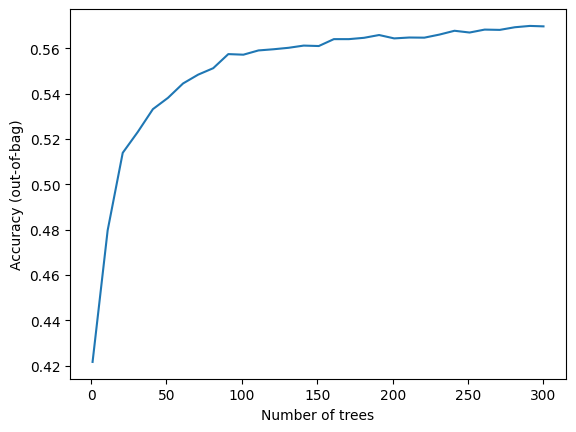

In [ ]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

We can also see some general stats on the OOB dataset:

In [ ]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=15441, accuracy=0.5697169872417589, loss=1.1539765087986924, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

Now, let us run an evaluation using the validation dataset.

## Variable importances

Variable importances generally indicate how much a feature contributes to the model predictions or quality. There are several ways to identify important features using TensorFlow Decision Forests.
Let us list the available `Variable Importances` for Decision Trees:

In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_AS_ROOT
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE


As an example, let us display the important features for the Variable Importance `NUM_AS_ROOT`.

The larger the importance score for `NUM_AS_ROOT`, the more impact it has on the outcome of the model.

By default, the list is sorted from the most important to the least. From the output you can infer that the feature at the top of the list is used as the root node in most number of trees in the random forest than any other feature.

In [ ]:
inspector.variable_importances()["SUM_SCORE"]

[("neighbourhood_cleansed" (4; #38), 869267.3679589732),
 ("Location" (4; #1), 519666.3918047147),
 ("bathrooms_numeric" (1; #11), 365344.508941839),
 ("Rating" (4; #2), 348934.9964113636),
 ("accommodates" (1; #4), 230687.9378265855),
 ("property_type" (4; #43), 228189.57465865876),
 ("Bedrooms" (1; #0), 217773.05290484428),
 ("longitude" (1; #29), 140720.67457691644),
 ("beds" (1; #12), 127192.12131820992),
 ("amenities_length" (1; #5), 124539.24444344844),
 ("latitude" (1; #28), 102069.9463811458),
 ("days_since_host" (1; #18), 92230.45875965012),
 ("availability_365" (1; #7), 78491.81930987537),
 ("host_total_listings_count" (1; #25), 75555.9056470953),
 ("number_of_reviews" (1; #40), 68443.66310524335),
 ("host_listings_count" (1; #24), 64606.71531794447),
 ("availability_90" (1; #9), 61825.38955363765),
 ("calculated_host_listings_count_entire_homes" (1; #14), 59538.13441153057),
 ("availability_60" (1; #8), 57145.298478131415),
 ("description_length" (1; #19), 56481.90043265105)

Plot the variable importances from the inspector using Matplotlib

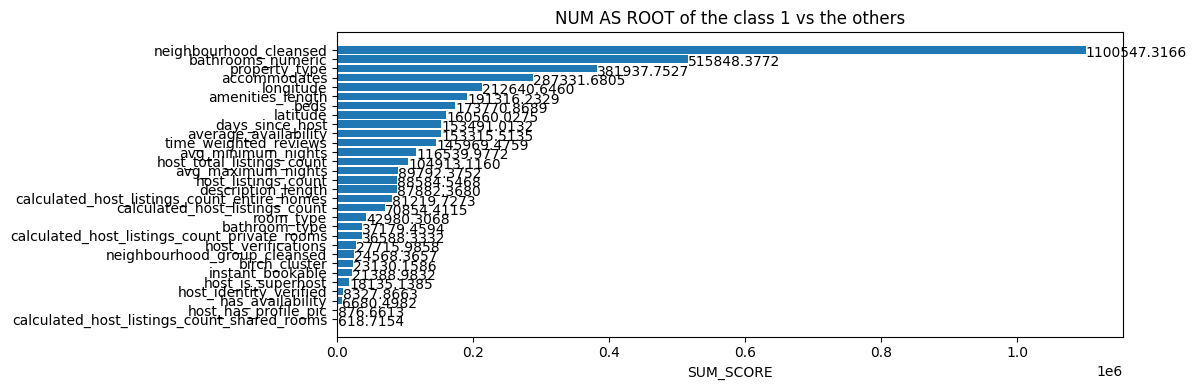

In [ ]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "SUM_SCORE"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

# Submission
Finally predict on the competition test data using the model.

In [ ]:
test_file_path = "test.csv"
test_data = pd.read_csv(test_file_path)
preprocessing(test_data)
ids = test_data.pop('id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.CLASSIFICATION)
preds = np.argmax(rf.predict(test_ds), axis=-1)
# preds = ensemble(models, best_weights,test_ds)

sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['price'] = preds
sample_submission_df.to_csv('submission.csv', index=False)
sample_submission_df.head()